In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import cv2
'''
저장되어있는 이미지를 불러와 .npy 파일을 생성
.npy 파일로 train, test를 수행할 것임
폭과 높이를 조정가능
'''
groups_folder_path= 'D:\Dataset\CNN_train\\'
categories=["alcoholic","non-alcoholic"]
num_classes=len(categories)
image_w = 128
image_h = 64
X = []
Y = []
for idex, categorie in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idex] = 1
    image_dir = groups_folder_path + categorie + '\\'
    print(image_dir)
  
    for top, dir, f in os.walk(image_dir):
        for filename in f:
            print(image_dir+filename,label)
            img = cv2.imread(image_dir+filename)
            img = cv2.resize(img, None, fx=image_w/img.shape[1], fy=image_h/img.shape[0])
            X.append(img/256)
            Y.append(label)

D:\Dataset\CNN_train\alcoholic\
D:\Dataset\CNN_train\alcoholic\final1.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final10.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final100.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final101.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final102.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final103.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final104.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final105.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final106.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final107.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final108.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final109.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final11.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final110.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final111.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final112.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final113.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final114.png [1, 0]
D:\Dataset\CNN_train\alcoholic\final115.png [1, 0]
D:\

In [4]:
from sklearn.model_selection import train_test_split

X = np.array(X)
Y = np.array(Y)
 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)
xy = (X_train, X_test, Y_train, Y_test)
 
np.save("D:\Dataset\CNN_train\img_data.npy", xy)

c:\Users\bml05\Anaconda3\lib\site-packages\numpy\lib\npyio.py:528: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [5]:
from keras import layers,models
import tensorflow as tf

X_train,X_test,y_train,y_test=np.load('D:\Dataset\CNN_train\img_data.npy',allow_pickle=True)
model=models.Sequential()
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(64, 128, 3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128,(1,1),activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation='softmax'))


In [6]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
history=model.fit(X_train, Y_train, batch_size=32, epochs=30)

Epoch 1/30
12/12 [==============================] - 4s 253ms/step - loss: 2.4228 - accuracy: 0.4888
Epoch 2/30
12/12 [==============================] - 3s 254ms/step - loss: 0.8432 - accuracy: 0.5307
Epoch 3/30
12/12 [==============================] - 3s 248ms/step - loss: 0.6894 - accuracy: 0.5531
Epoch 4/30
12/12 [==============================] - 3s 250ms/step - loss: 0.6652 - accuracy: 0.6173
Epoch 5/30
12/12 [==============================] - 3s 248ms/step - loss: 0.6340 - accuracy: 0.6620
Epoch 6/30
12/12 [==============================] - 3s 249ms/step - loss: 0.6199 - accuracy: 0.6508
Epoch 7/30
12/12 [==============================] - 3s 247ms/step - loss: 0.5945 - accuracy: 0.6955
Epoch 8/30
12/12 [==============================] - 3s 249ms/step - loss: 0.5204 - accuracy: 0.7542
Epoch 9/30
12/12 [==============================] - 3s 249ms/step - loss: 0.5076 - accuracy: 0.7402
Epoch 10/30
12/12 [==============================] - 3s 247ms/step - loss: 0.5116 - accuracy: 0.7486

In [27]:
prediction=model.predict(X_test)
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

4/4 [==============================] - 0s 39ms/step
4/4 - 0s - loss: 0.3075 - accuracy: 0.8833 - 170ms/epoch - 42ms/step


Text(0.5, 1.0, 'loss per epoch')

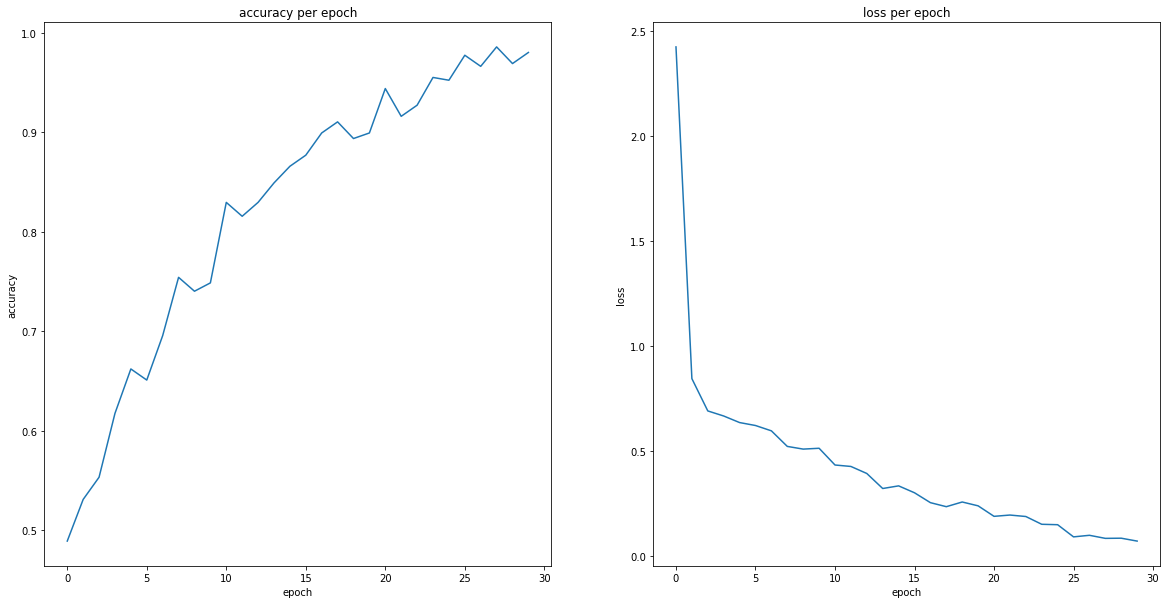

In [28]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].plot(history.history['accuracy'])
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].set_title('accuracy per epoch')
ax[1].plot(history.history['loss'])
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].set_title('loss per epoch')

In [39]:
from sklearn.metrics import confusion_matrix
predicted=[]
yf_test=[]

for index,value in enumerate(prediction):
    if value[0]>value[1]:
        predicted.append(0)
        if Y_test[index][0]>Y_test[index][1]:
            yf_test.append(0)
        else:
            yf_test.append(1)
    else:
        predicted.append(1)
        if Y_test[index][0]>Y_test[index][1]:
            yf_test.append(0)
        else:
            yf_test.append(1)
            
confusion_matrix(yf_test, predicted)

array([[50,  9],
       [ 5, 56]], dtype=int64)